In [3]:
import os.path

import tensorflow as tf
import sklearn
import numpy as np

from data_processor import DataProcessor
from evaluation_utils import get_test_data_and_labels
from data_loader_class import DataLoader
from gradcam import GradCAM

In [52]:
path = r'C:\Users\dicia\PycharmProjects\PythonProject\Experiments\290125\02\models\final_model.keras'
model = tf.keras.models.load_model(path)

In [53]:
model.summary()

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convnext_small (Functional)     │ (None, 768)            │    49,454,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 768)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_norm (BatchNormalization) │ (None, 768)            │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_norm_2                    │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83,363,941 (318.01 MB)

 Trainable params: 16,854,017 (64.29 MB)

 Non-trainable params: 32,801,888 (125.13 MB)

 Optimizer params: 33,708,036 (128.59 MB)

In [5]:

test_generator = DataLoader(split='test')
images, labels = get_test_data_and_labels(test_generator)





In [69]:
os.getcwd()

'C:\\Users\\dicia\\PycharmProjects\\PythonProject'

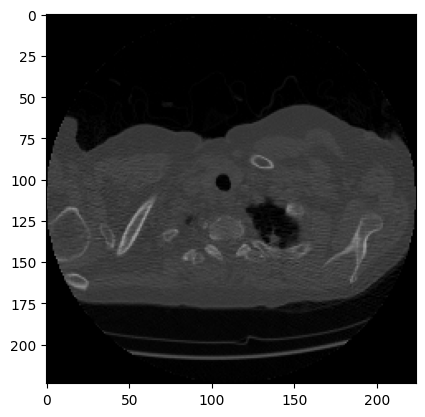

In [6]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(images[2])

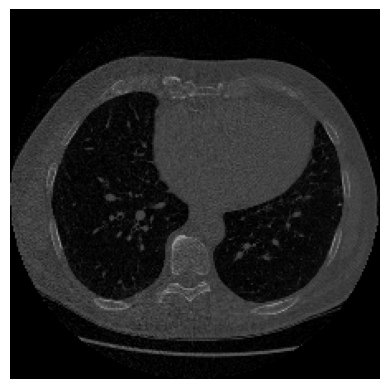

In [8]:
img = images[5]
plt.figure()
plt.imshow(img)
plt.axis('off')
plt.savefig('test.png')



proc = DataProcessor(img)

In [15]:
img.shape
img_prep = proc.clahe(img[np.newaxis, ...])

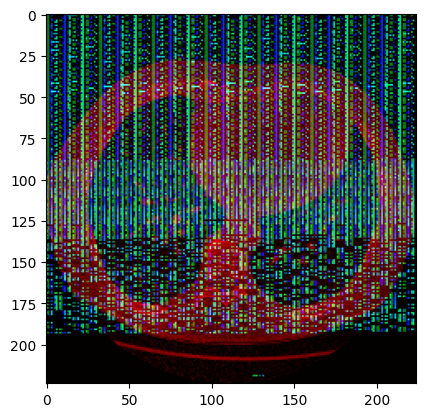

In [18]:
plt.figure()
plt.imshow(img_prep[0,...])
plt.savefig('test2.png')